<a href="https://colab.research.google.com/github/sfirdous/data-science/blob/main/ML2/Assignments/multinomial_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 01: Multinomial Classification from Scratch using the Iris Dataset**

## 1.Load and Prepare the Data


In [ ]:
# required libraries
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch

In [ ]:
# sklearn.datasets.load_iris function to load the dataset.
iris = load_iris()

# Extract features X and target labels y.
X = iris.data
y = iris.target

# define number of samples and number of categoies
N = X.shape[0]
K = iris.target_names.shape[0]

# number of features
d = X.shape[1]


In [ ]:
# mean and std of each column in feature
mean = X.mean(axis = 0)
std = X.std(axis = 0)

# Normalize the features (mean 0, variance 1).
X_normalized = torch.from_numpy((X - mean) / std)

In [ ]:
# Convert target labels to one-hot encoding.

# initialize tensor with zeros
one_hot_y = torch.zeros(N,K)

# populate the one_hot tensor
for i,target in enumerate(y):
  one_hot_y[i,target] = 1


In [ ]:
# split the dataset into test and train
split_ratio = 0.8         # 80% train,20% test

# select random indices
indices = torch.randperm(N)

train_N = int(split_ratio * N)

# select train and test indices
train_indices = indices[:train_N]
test_indices = indices[train_N:]

X_train = X_normalized[train_indices]
y_train = one_hot_y[train_indices]

X_test = X_normalized[test_indices]
y_test = one_hot_y[test_indices]

test_N = X_test.size(0)


## 2.Implement Softmax Regression from Scratch

In [ ]:
# softmax function
def softmax(z):
  exp_z = torch.exp(z)
  return exp_z / torch.sum(exp_z)

# Cross-Entropy Loss
def cross_entropy_loss(y_hat,y_train):
  loss = 0.0
  for i in range(train_N):
    loss += y_train[i] @ torch.log(y_hat[i].T)
  return -loss.item()/train_N

## 3.Train the Model

In [ ]:
# Initialize weights W and biases b randomly.
torch.manual_seed(4)
W = torch.randn(d,K).double()    # 3 weights
b = torch.randn(K).double()      # 3 biases for each category

# Hyperparameters
lr = 0.1
epochs = 1000

# track loss
loss_history = []

In [ ]:
# Training loop
for epoch in range(epochs):
  # a.Perform forward pass.
  Z = X_train @ W + b
  y_hat = torch.zeros(train_N,K)

  # predicted probability for each sample
  for i in range(train_N):
    y_hat[i,] = softmax(Z[i])

  # b.Compute loss.
  loss = cross_entropy_loss(y_hat,y_train)

  # c.Compute gradients.
  error = y_hat - y_train
  grad_w = X_train.T @ error.double()
  grad_b = torch.mean(error,dim=0)

  # Update weights and biases
  W -= lr * grad_w
  b -= lr * grad_b

  # Track loss
  loss_history.append(loss)

  # print loss every 50 epochs.
  if epoch % 50 == 0:
    print(f"Epoch {epoch}: Loss = {loss:.4f}")



Epoch 0: Loss = 0.5799
Epoch 50: Loss = 0.2562
Epoch 100: Loss = 0.1994
Epoch 150: Loss = 0.1569
Epoch 200: Loss = 0.1341
Epoch 250: Loss = 0.1239
Epoch 300: Loss = 0.1160
Epoch 350: Loss = 0.1096
Epoch 400: Loss = 0.1042
Epoch 450: Loss = 0.0997
Epoch 500: Loss = 0.0959
Epoch 550: Loss = 0.0926
Epoch 600: Loss = 0.0897
Epoch 650: Loss = 0.0871
Epoch 700: Loss = 0.0849
Epoch 750: Loss = 0.0828
Epoch 800: Loss = 0.0810
Epoch 850: Loss = 0.0794
Epoch 900: Loss = 0.0779
Epoch 950: Loss = 0.0765


## 4.Evaluate the Model

In [ ]:
# a.Predict labels for the training set.
Z_pred = X_train @ W + b
y_pred = torch.zeros(train_N,K)

# predicted probability for each sample
for i in range(train_N):
  y_pred[i,] = softmax(Z_pred[i])

# convert to one-hot encoding
# find the index where maximum value occurs
max_indices = torch.argmax(y_pred,dim = 1,keepdim=True)  #shape N,1(150,1)

# initialize tensor of same size with zeros
one_hot_ypred = torch.zeros_like(y_pred)

# add 1 at the index of maximum value
one_hot_ypred.scatter_(1,max_indices,1)

tensor([[0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0

In [ ]:
# b.Compute accuracy.

# contains index of the class
true_classes = torch.argmax(y_train,dim = 1)          #shape: (150,)
predicted_classes = torch.argmax(one_hot_ypred,dim = 1) #shape: (150,)

# Compare true and predicted classes and compute mean correct
correct = (true_classes == predicted_classes).sum()
accuracy = correct / train_N
print(f'Accuracy: {accuracy.item():.2f}')

Accuracy: 0.98


In [ ]:
# c.Display a confusion matrix.
confusion_matrix = torch.zeros(K,K)

for t,p in zip(true_classes,predicted_classes):
  confusion_matrix[t,p] += 1

print(confusion_matrix)

tensor([[43.,  0.,  0.],
        [ 0., 37.,  2.],
        [ 0.,  1., 37.]])


# Loss curve plot

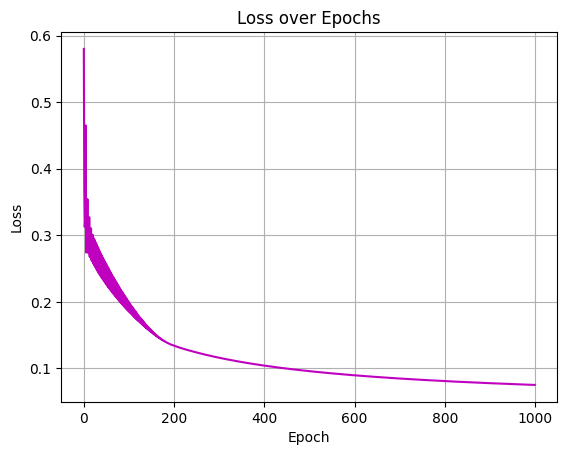

In [ ]:
plt.plot(range(epochs),loss_history,'m-')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss over Epochs")
plt.grid(True)
plt.show()

# 5. Evaluation on Test Data

In [ ]:
# a.Predict labels for the training set.
Z_pred = X_test @ W + b
y_pred = torch.zeros(test_N,K)

# predicted probability for each sample
for i in range(test_N):
  y_pred[i,] = softmax(Z_pred[i])

# convert to one-hot encoding
# find the index where maximum value occurs
max_indices = torch.argmax(y_pred,dim = 1,keepdim=True)  #shape N,1(150,1)

# initialize tensor of same size with zeros
one_hot_ypred = torch.zeros_like(y_pred)

# add 1 at the index of maximum value
one_hot_ypred.scatter_(1,max_indices,1)

tensor([[0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.]])

In [ ]:
# b.Compute accuracy.

# contains index of the class
true_classes = torch.argmax(y_test,dim = 1)             #shape: (150,)
predicted_classes = torch.argmax(one_hot_ypred,dim = 1) #shape: (150,)

# Compare true and predicted classes and compute mean correct
correct = (true_classes == predicted_classes).sum()
accuracy = correct / test_N
print(f'Accuracy: {accuracy.item():.2f}')

Accuracy: 0.97


In [ ]:
# c.Display a confusion matrix.
confusion_matrix = torch.zeros(K,K)

for t,p in zip(true_classes,predicted_classes):
  confusion_matrix[t,p] += 1

print(confusion_matrix)

tensor([[ 7.,  0.,  0.],
        [ 0., 10.,  1.],
        [ 0.,  0., 12.]])


# Decision Boundary

In [ ]:
plt.scatter(X[:,0],X[:,1],c = one_hot_y,cmap='bwr',alpha = 0.7)
x1_range = torch.linspace(X[:,0].min(),X[:,0].max(),150)
# print(W[0,:2])
x2_boundary = -(W[0,:1]*x1_range+b[0]) / W[1,:1]
plt.plot(x1_range,x2_boundary,'k')
